In [1]:
import numpy as np
import pandas as pd
from scipy import stats

**EXERCISE 1:** The hourly wages in a particular industry are normally distributed with mean 13.20 dollars and standard deviation 2.50 dollars. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [ ]:
# H0: mu = 12.20
# H1: mu > 12.20

In [2]:
alpha = .01

In [3]:
z = (13.20 - 12.20) / (2.5/np.sqrt(40))

In [4]:
z

2.5298221281347035

In [5]:
p_value = 1 - stats.norm().cdf(z)    # p-value

In [6]:
p_value

0.005706018193000872

In [16]:
if p_value < alpha:
    print('reject H0')
    
else:
    print("fail to reject")

reject H0


**Conclusion:** company can be accused of paying substandart wages

**EXERCISE 2:** Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [ ]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [11]:
alpha_soil = 0.01

In [8]:
soil = pd.read_csv('soil.csv')

In [6]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [9]:
stats.ttest_ind(soil.Soil1, soil.Soil2, nan_policy="omit")

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [10]:
indSamp = stats.ttest_ind(soil.Soil1, soil.Soil2, nan_policy="omit")

In [14]:
indSamp.pvalue

2.5932287323528147e-06

In [13]:
if indSamp.pvalue < alpha_soil:
    print('reject H0')
    
else:
    print("fail to reject")

reject H0


**Conclusion:** the soils differ

**EXERCISE 3:** The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pisa = pd.read_csv("PISA.csv")

In [66]:
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


## 1.

In [95]:
pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [101]:
continents = ['EU', 'AS', 'SA', 'OC', 'AF']

for item in continents:
    
    print("\n", item)
    
    print(pisa[pisa.Continent_Code == item].describe())


 EU
       internet_users_per_100        Math     Reading     Science
count               37.000000   37.000000   37.000000   37.000000
mean                77.274888  477.981449  476.164608  478.299381
std                 12.425773   35.150403   37.720545   34.450616
min                 53.744979  371.311400  351.741500  383.682400
25%                 68.632900  464.040100  452.514300  460.774900
50%                 76.184000  489.728700  487.250100  490.225000
75%                 87.479056  503.722000  499.814600  501.936900
max                 98.200000  521.250600  526.424700  534.193700

 AS
       internet_users_per_100        Math     Reading     Science
count               17.000000   17.000000   17.000000   17.000000
mean                68.455613  466.216647  454.059682  467.945847
std                 21.086060   64.356490   57.048962   56.671371
min                 21.976068  380.259000  346.549000  386.485400
25%                 50.300000  403.833200  408.102200  417.611200


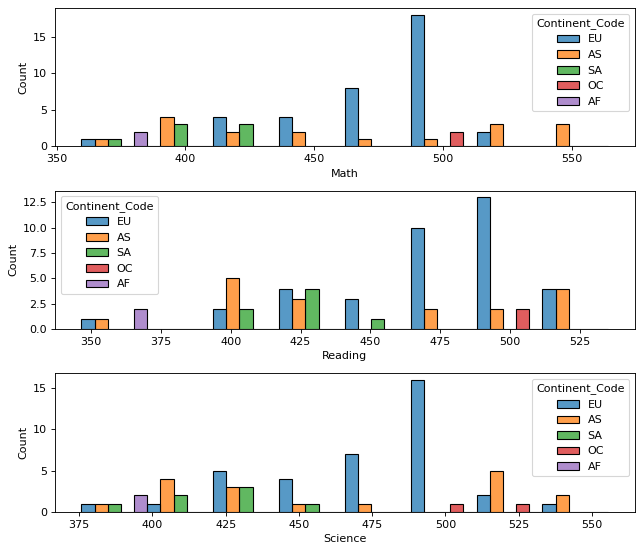

In [89]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,7), dpi=80)


sns.histplot(data=pisa, x="Math", hue="Continent_Code",ax=ax[0],multiple="dodge")

sns.histplot(data=pisa, x="Reading", hue="Continent_Code",ax=ax[1], multiple="dodge")

sns.histplot(data=pisa, x="Science", hue="Continent_Code",ax=ax[2], multiple="dodge")


plt.tight_layout()

## 2.

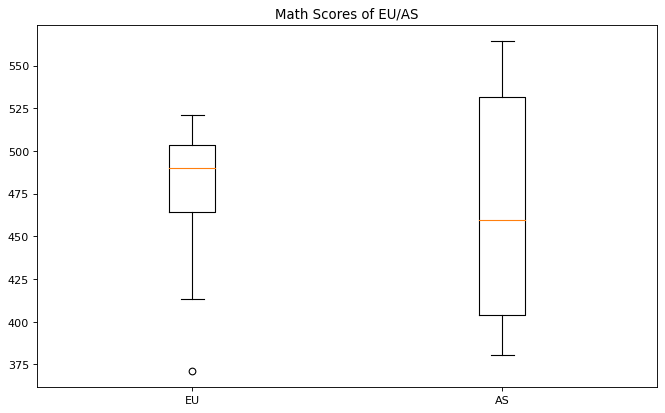

In [114]:
plt.figure(figsize=(10,6), dpi=80)

plt.boxplot([pisa[pisa.Continent_Code == "EU"].Math, pisa[pisa.Continent_Code == "AS"].Math], labels=["EU", "AS"])

plt.title("Math Scores of EU/AS")

plt.show()


**Looking for average difference with independent t test**

In [3]:
stats.ttest_ind(pisa[pisa.Continent_Code == "EU"].Math, pisa[pisa.Continent_Code == "AS"].Math)

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [4]:
indSamp_pisa = stats.ttest_ind(pisa[pisa.Continent_Code == "EU"].Math, pisa[pisa.Continent_Code == "AS"].Math)

In [5]:
if indSamp_pisa.pvalue < 0.05:
    print('reject H0')
    
else:
    print("fail to reject")

fail to reject


**Conclusion:** There isn't a significant difference between EU and AS with 95% sigificance

**EXERCISE 4:** The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

In [ ]:
# H0: mu_english = mu_math
# H1: mu_english != mu_math

In [37]:
student = pd.read_csv("students_2014.csv")

In [50]:
stats.ttest_rel(student.English, student.Math, nan_policy="omit")

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [51]:
indSamp = stats.ttest_rel(student.English, student.Math, nan_policy="omit")

In [52]:
indSamp.pvalue

3.071098719220689e-128

In [53]:
if indSamp.pvalue < 0.05:
    print('reject H0')
    
else:
    print("fail to reject")

reject H0


**Conclusion:** There is difference between English and Math averages